In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings('ignore')

In [4]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop('Survived', axis=1)

In [17]:
df_train = pd.read_csv('data\\train.csv')
df_test = pd.read_csv('data\\test.csv')

df_all = concat_df(df_train, df_test)
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

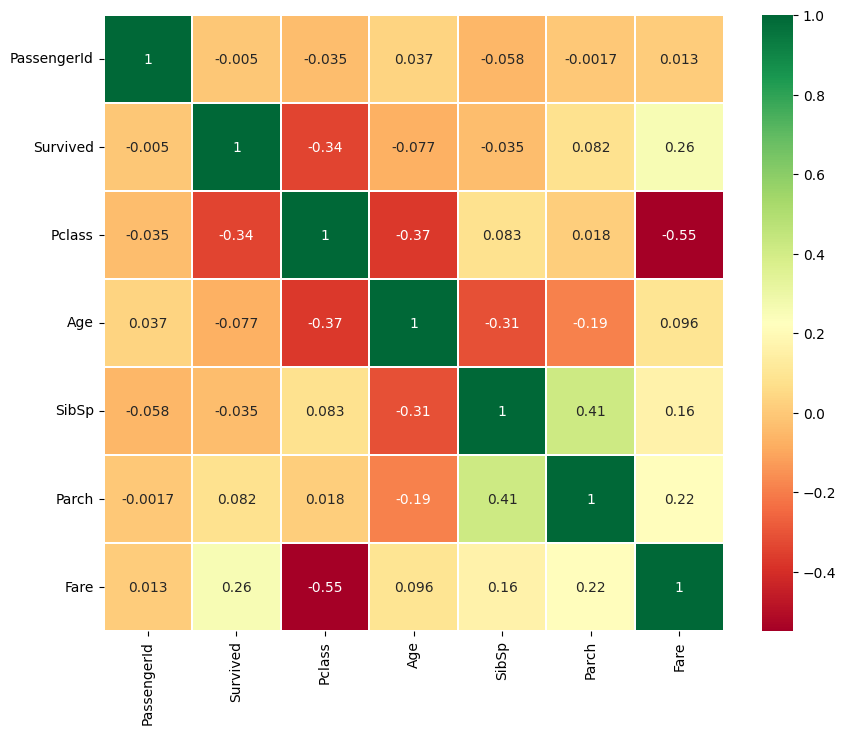

In [18]:
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S


In [32]:
max_col_len = max(len(col) for col in df_train.columns)

print(f'{'Columns'.ljust(max_col_len//2).rjust(max_col_len//2)} \t Unique Values')

for col in df_train.columns:
    print(f'{col.ljust(max_col_len)}: \t {df_train[col].nunique()}')

Columns 	 Unique Values
PassengerId: 	 891
Survived   : 	 2
Pclass     : 	 3
Name       : 	 891
Sex        : 	 2
Age        : 	 88
SibSp      : 	 7
Parch      : 	 7
Ticket     : 	 681
Fare       : 	 248
Cabin      : 	 147
Embarked   : 	 3


In [33]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [41]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [43]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [44]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [45]:
df_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [46]:
df_train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [47]:
df_train['Survived'] = df_train['Survived'].astype('category')

In [48]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [49]:
df_all.Cabin.fillna("N", inplace=True)
df_all.Cabin = [str(i)[0] for i in df_all.Cabin]

In [52]:
def percent_value_counts(pdf, feature):
    percent = pd.DataFrame(round(pdf.loc[:, feature].value_counts(dropna=False, normalize=True)*100, 2))
    total = pd.DataFrame(pdf.loc[:, feature].value_counts(dropna=False))
    
    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis=1)

percent_value_counts(df_all, "Cabin")

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [53]:
df_all.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [54]:
def cabin_estimate(i):
    if i < 16:
        return 'G'
    elif i >= 16 and i < 27:
        return 'F'
    elif i >= 27 and i < 38:
        return 'T'
    elif i >= 38 and i < 47:
        return 'A'
    elif i >= 47 and i < 53:
        return 'E'
    elif i >= 53 and i < 54:
        return 'D'
    elif i >= 54 and i < 116:
        return 'C'
    else:
        return 'B'

In [55]:
df_all['Cabin'] = df_all.Fare.apply(lambda x: cabin_estimate(x))
percent_value_counts(df_all, 'Cabin')

,Total,Percent
G,714,54.55
F,201,15.36
C,143,10.92
T,109,8.33
B,72,5.50
A,37,2.83
E,27,2.06
D,6,0.46


In [56]:
df_train[df_train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [57]:
df_train['Embarked'].fillna('C', inplace=True)
df_train['Embarked'].value_counts()

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked
0,C
1,Q
2,S


# Feature Engineering

In [59]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

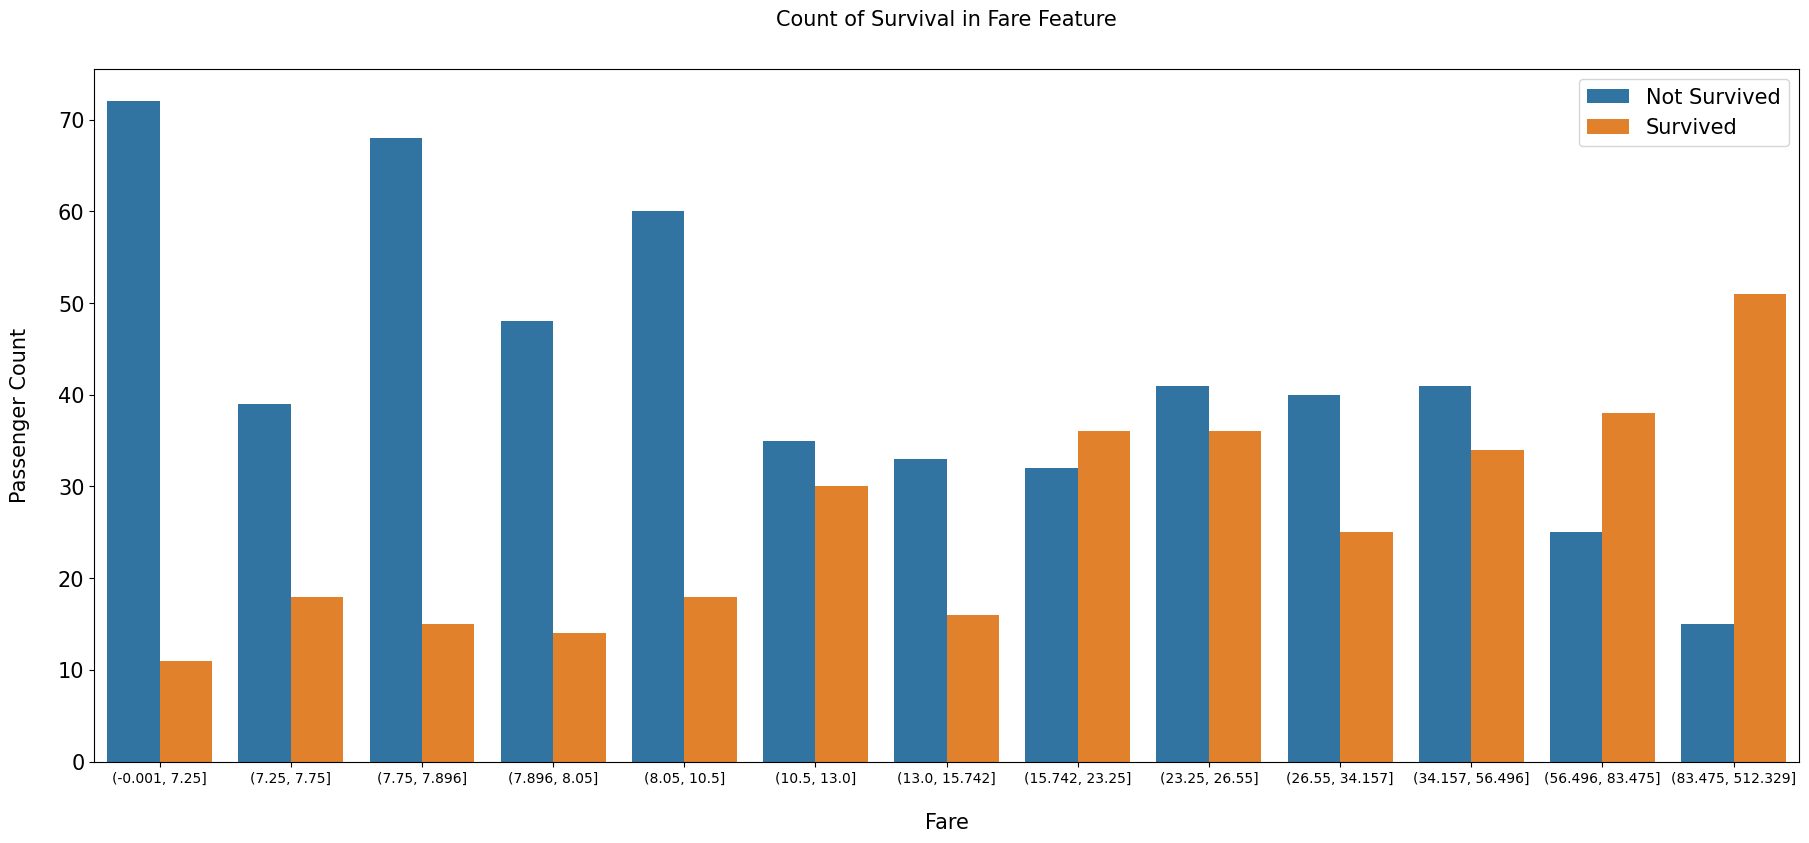

In [60]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

In [61]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

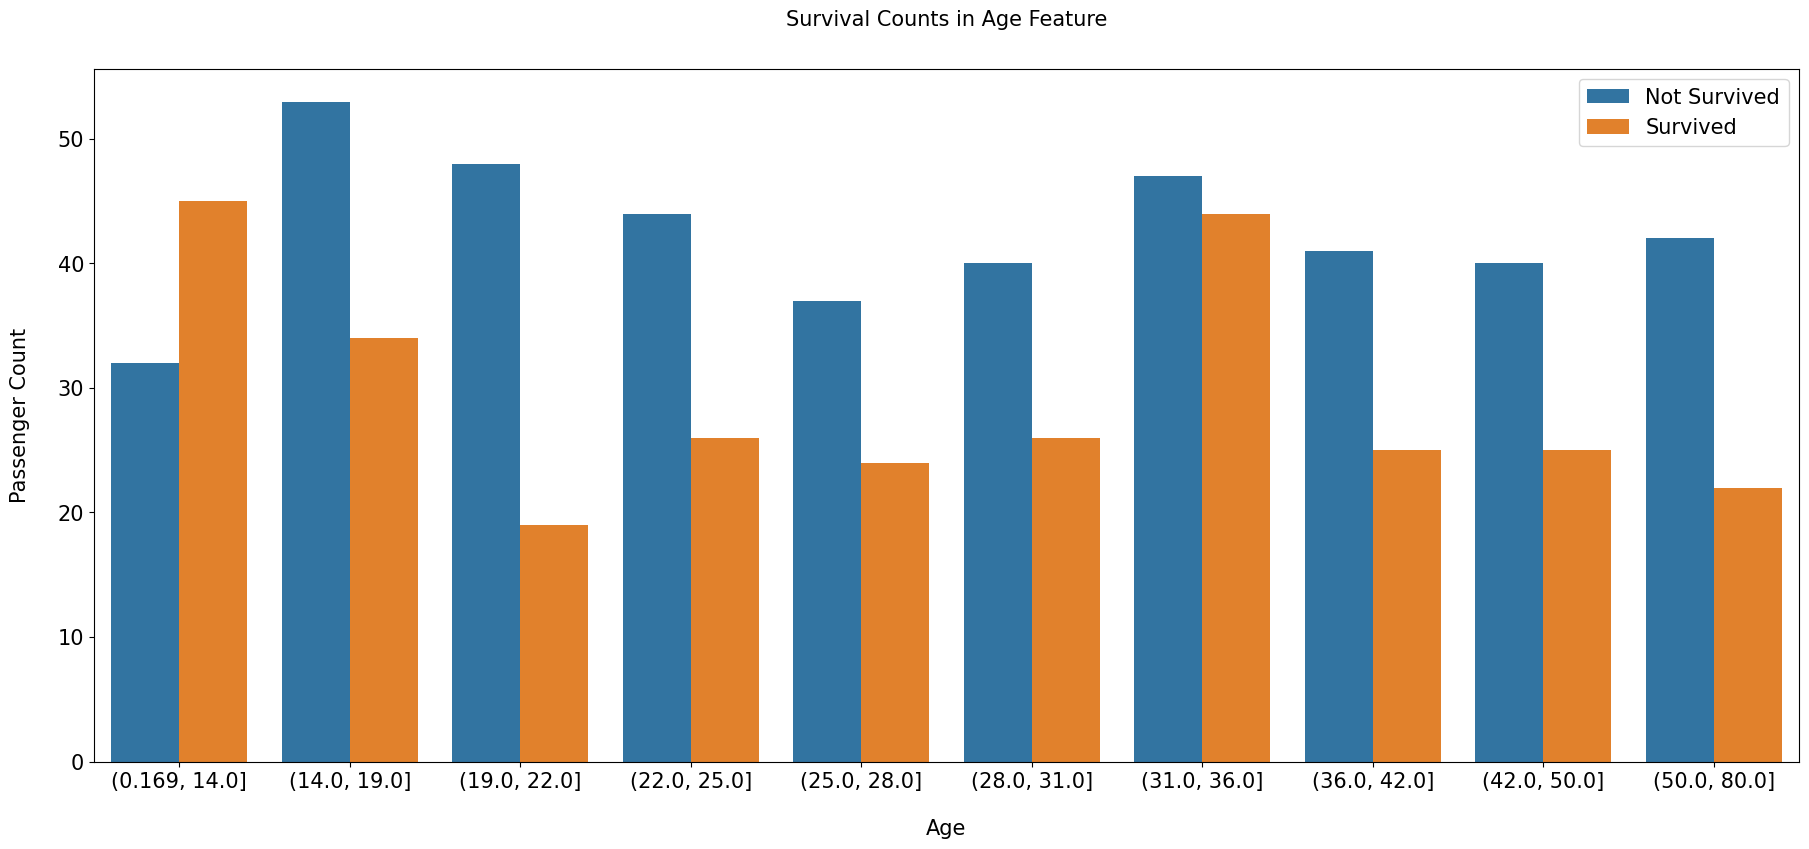

In [62]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

SibSp - count of siblings and spouse
Parch - count of parents and children

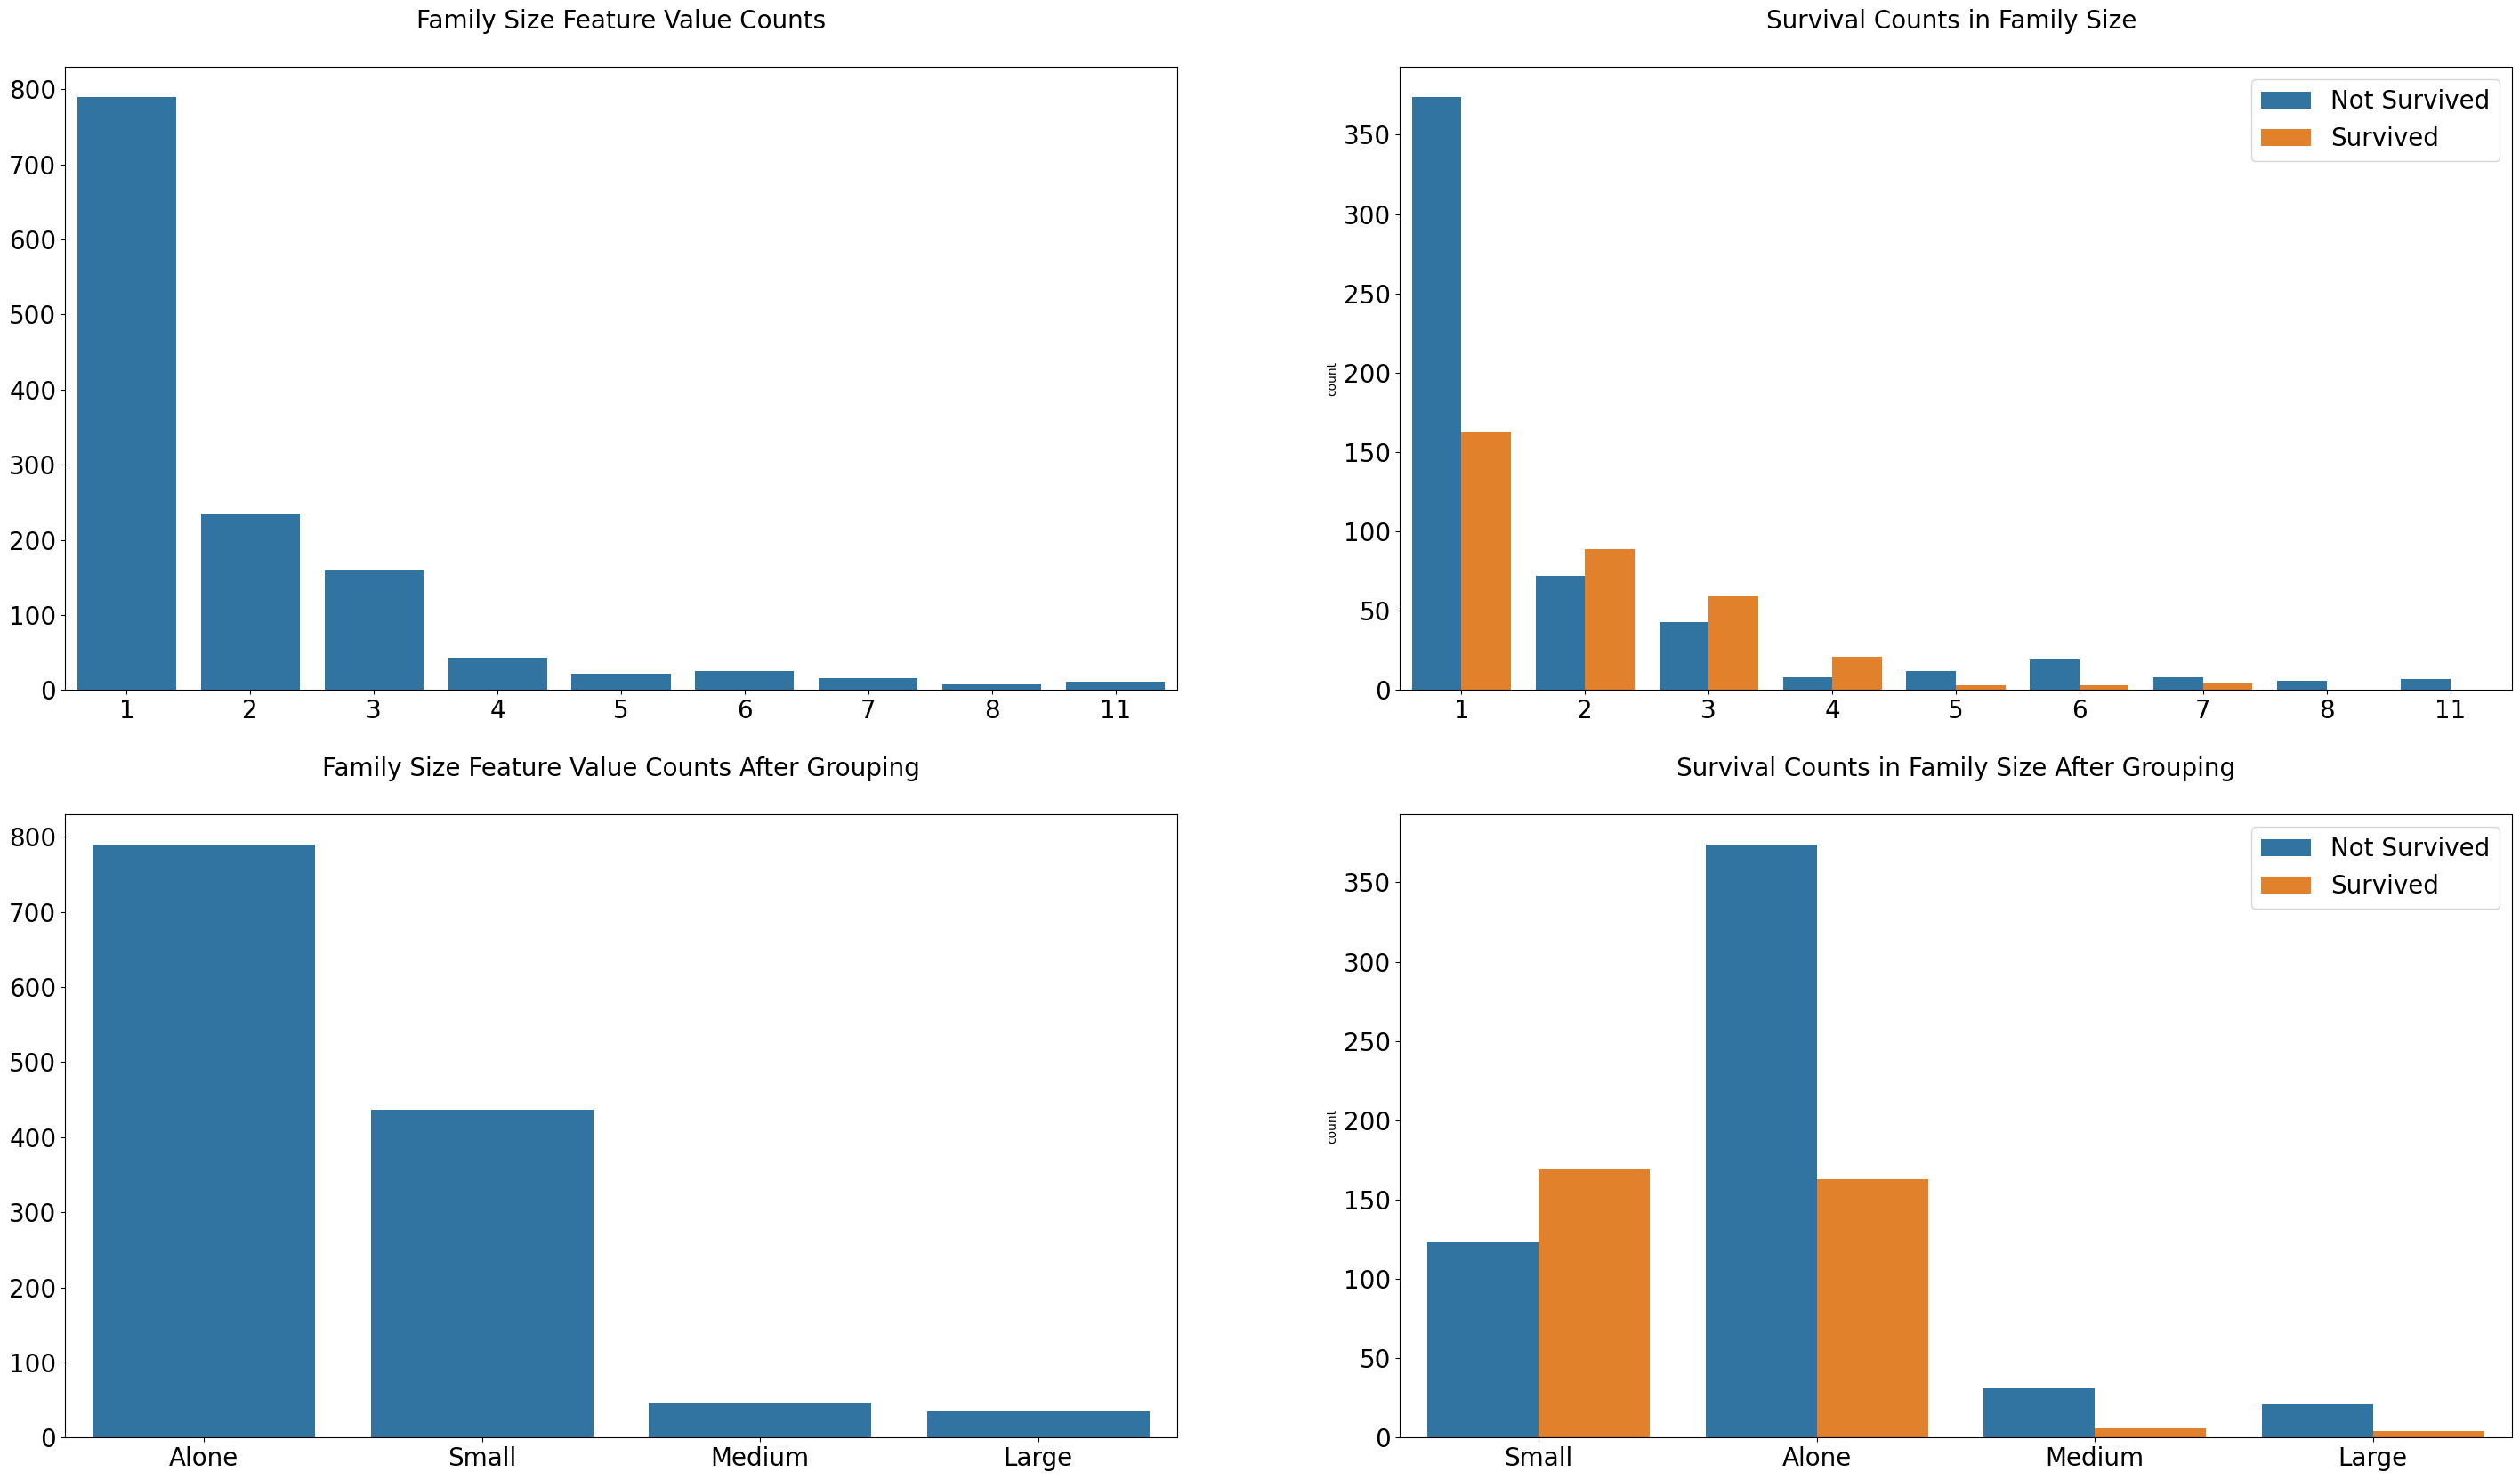

In [69]:
df_all['Family Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family Size'].value_counts().index, y=df_all['Family Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = { 1: "Alone", 2: "Small", 3: "Small", 4: "Small", 5: "Medium", 6: "Medium", 7: "Large", 8: "Large", 11: "Large"}

df_all['Family_Size_Grouped'] = df_all['Family Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')

In [70]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

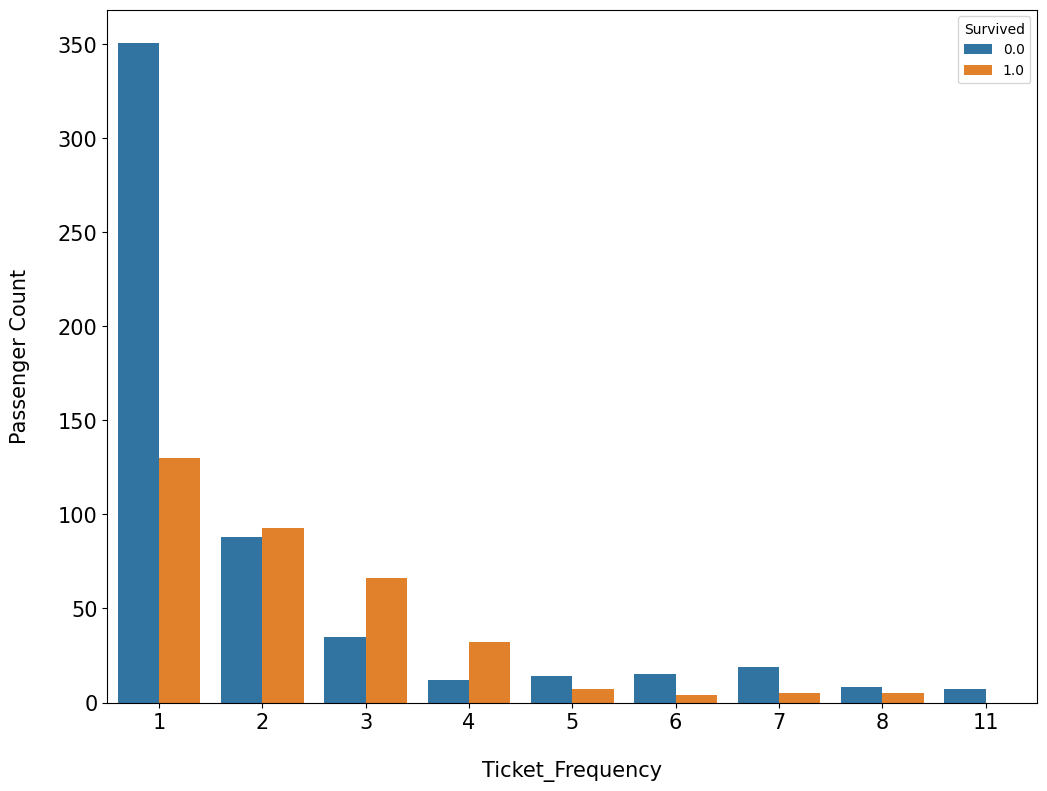

In [74]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(data=df_all, x='Ticket_Frequency', hue='Survived')

plt.xlabel('Ticket_Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.show()

In [75]:
df_all.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [76]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

In [87]:
def extract_surname(data):
    families = []
    
    for i in range(len(data)):
        name = data.iloc[i]
        
        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
        
    return families

In [89]:
df_all['Family'] = extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]

dfs = [df_train, df_test]

In [91]:
df_all.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married,Family
1125,"(36.0, 42.0]",C,C,"(56.496, 83.475]","Cumings, Mr. John Bradley",0,1126,1,male,1,NaN,PC 17599,2,Small,2,Mr,0,Cumings
1273,NaN,G,S,"(13.0, 15.742]","Risien, Mrs. Samuel (Emma)",0,1274,3,female,0,NaN,364498,1,Alone,2,Mrs,1,Risien
155,"(50.0, 80.0]",C,C,"(56.496, 83.475]","Williams, Mr. Charles Duane",1,156,1,male,0,0.0,PC 17597,2,Small,2,Mr,0,Williams
1052,"(0.169, 14.0]",G,C,"(13.0, 15.742]","Touma, Master. Georges Youssef",1,1053,3,male,1,NaN,2650,3,Small,3,Master,0,Touma
294,"(22.0, 25.0]",G,S,"(7.75, 7.896]","Mineff, Mr. Ivan",0,295,3,male,0,0.0,349233,1,Alone,1,Mr,0,Mineff
